In [1]:
import numpy
import pandas
import geopandas
import scipy
import shapely
import matplotlib.pyplot
import pysal
import math
#import bokeh
#import cartopy
#import statsmodels
#import sklearn
#import geoplot
#import osmnx
#import folium
#import dash
#import rasterio
#import rasterstats

C:\Users\Zachary\Anaconda3\lib\site-packages\pysal\explore\segregation\network\network.py:16: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  "You need pandana and urbanaccess to work with segregation's network module\n"
C:\Users\Zachary\Anaconda3\lib\site-packages\pysal\model\spvcm\abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


In [3]:
from shapely.geometry import Point, LineString, Polygon

In [7]:
point1 = Point(2.2, 4.2)

In [8]:
point2 = Point(7.2, -25.1)

In [9]:
point3 = Point(9.26, -2.456)

In [10]:
point3D = Point(9.26, -2.456, 0.57)

In [11]:
point_type = type(point1)

In [12]:
print(point_type)

<class 'shapely.geometry.point.Point'>


In [13]:
print(point1)

POINT (2.2 4.2)


In [14]:
print(point3D)

POINT Z (9.26 -2.456 0.57)


In [15]:
print(point1.coords)

In [18]:
xy = point_coords.xy

In [17]:
point_coords = point1.coords

In [19]:
x = point1.x

In [20]:
print(x)

2.2


In [21]:
print(point_coords)

In [22]:
print(xy)

(array('d', [2.2]), array('d', [4.2]))


In [23]:
point_dist = point1.distance(point2)

In [24]:
print(point_dist)

29.723559679150142


In [25]:
line = LineString([point1, point2, point3])

In [26]:
print(line)

LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456)


In [28]:
l_length = line.length

In [29]:
l_centroid = line.centroid

In [31]:
print(l_length)

52.46106912939557


In [32]:
print(l_centroid)

POINT (6.229961354035622 -11.89241115757239)


In [31]:
def createPointGeom(x_coord, y_coord):
    point = Point(x_coord, y_coord)
    return point

In [32]:
test = createPointGeom(24,345)

In [33]:
print(test)

POINT (24 345)


In [34]:
type(test)

shapely.geometry.point.Point

In [48]:
def createLineGeom(point_list):
    for point in point_list:
        if type(point) != shapely.geometry.point.Point:
            line = "not points"
        else:
            line = LineString(point_list)
    
    return line

In [49]:
test2 = createPointGeom(34, 346)

In [50]:
test_line = createLineGeom([test, test2])

In [51]:
type(test_line)

shapely.geometry.linestring.LineString

In [52]:
print(test_line)

LINESTRING (24 345, 34 346)


In [47]:
type(test) != shapely.geometry.point.Point

False

In [81]:
import geopandas as gpd

In [89]:
fp = "Data/Data/DAMSELFISH_distributions.shp"

In [90]:
data = gpd.read_file(fp)

In [91]:
type(data)

geopandas.geodataframe.GeoDataFrame

In [92]:
data.head()

,ID_NO,BINOMIAL,ORIGIN,COMPILER,YEAR,CITATION,SOURCE,DIST_COMM,ISLAND,SUBSPECIES,...,RL_UPDATE,KINGDOM_NA,PHYLUM_NAM,CLASS_NAME,ORDER_NAME,FAMILY_NAM,GENUS_NAME,SPECIES_NA,CATEGORY,geometry
0,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-115.64375 29.71392, -115.61585 29.6..."
1,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-105.58995 21.89340, -105.56483 21.8..."
2,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-111.15962 19.01536, -111.15948 18.9..."
3,183793.0,Chromis intercrusma,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Chromis,intercrusma,LC,"POLYGON ((-80.86500 -0.77894, -80.75930 -0.833..."
4,183793.0,Chromis intercrusma,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Chromis,intercrusma,LC,"POLYGON ((-67.33922 -55.67610, -67.33755 -55.6..."


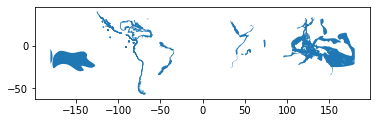

In [93]:
data.plot()

In [101]:
out = r"./Data/Data/DAMSELFISH_distributions_SELECTION.shp"

In [102]:
selection = data[0:50]

In [103]:
selection.to_file(out)

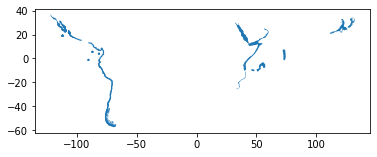

In [104]:
selection.plot()

In [105]:
data['geometry'].head()

0    POLYGON ((-115.64375 29.71392, -115.61585 29.6...
1    POLYGON ((-105.58995 21.89340, -105.56483 21.8...
2    POLYGON ((-111.15962 19.01536, -111.15948 18.9...
3    POLYGON ((-80.86500 -0.77894, -80.75930 -0.833...
4    POLYGON ((-67.33922 -55.67610, -67.33755 -55.6...
Name: geometry, dtype: geometry

In [108]:
for index, row in selection.iterrows():
    poly_area = row['geometry'].area
    print("Polygon area at index {0} is : {1:.3f}".format(index, poly_area))

Polygon area at index 0 is : 19.396
Polygon area at index 1 is : 6.146
Polygon area at index 2 is : 2.697
Polygon area at index 3 is : 87.461
Polygon area at index 4 is : 0.001
Polygon area at index 5 is : 0.000
Polygon area at index 6 is : 2.732
Polygon area at index 7 is : 2.655
Polygon area at index 8 is : 2.382
Polygon area at index 9 is : 0.536
Polygon area at index 10 is : 0.340
Polygon area at index 11 is : 0.012
Polygon area at index 12 is : 0.000
Polygon area at index 13 is : 0.000
Polygon area at index 14 is : 27.348
Polygon area at index 15 is : 10.479
Polygon area at index 16 is : 2.697
Polygon area at index 17 is : 10.749
Polygon area at index 18 is : 87.246
Polygon area at index 19 is : 0.001
Polygon area at index 20 is : 0.000
Polygon area at index 21 is : 113.242
Polygon area at index 22 is : 18.438
Polygon area at index 23 is : 16.438
Polygon area at index 24 is : 0.000
Polygon area at index 25 is : 4.811
Polygon area at index 26 is : 2.697
Polygon area at index 27 is 

In [109]:
data['area'] = data.area

In [110]:
data.head()

,ID_NO,BINOMIAL,ORIGIN,COMPILER,YEAR,CITATION,SOURCE,DIST_COMM,ISLAND,SUBSPECIES,...,KINGDOM_NA,PHYLUM_NAM,CLASS_NAME,ORDER_NAME,FAMILY_NAM,GENUS_NAME,SPECIES_NA,CATEGORY,geometry,area
0,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-115.64375 29.71392, -115.61585 29.6...",19.396254
1,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-105.58995 21.89340, -105.56483 21.8...",6.145902
2,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-111.15962 19.01536, -111.15948 18.9...",2.697207
3,183793.0,Chromis intercrusma,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Chromis,intercrusma,LC,"POLYGON ((-80.86500 -0.77894, -80.75930 -0.833...",87.460621
4,183793.0,Chromis intercrusma,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Chromis,intercrusma,LC,"POLYGON ((-67.33922 -55.67610, -67.33755 -55.6...",0.000918


In [111]:
max_area = data['area'].max()

In [112]:
mean_area = data['area'].mean()

In [113]:
print("Max area: %s\nMean area: %s" %(round(max_area, 2), round(mean_area, 2)))

Max area: 1493.2
Mean area: 19.96


In [114]:
newdata = gpd.GeoDataFrame()

In [115]:
In [15]: newdata

""


In [116]:
newdata['geometry'] = None

In [117]:
newdata

,geometry


In [118]:
coordinates = [(24.950899, 60.169158), (24.953492, 60.169158), (24.953510, 60.170104), (24.950958, 60.169990)]

In [119]:
poly = Polygon(coordinates)

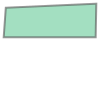

In [120]:
poly

In [121]:
newdata.loc[0, 'geometry'] = poly

In [122]:
newdata

,geometry
0,"POLYGON ((24.95090 60.16916, 24.95349 60.16916..."


In [123]:
newdata.loc[0, 'Location'] = 'Senaatintori'

In [124]:
newdata

,geometry,Location
0,"POLYGON ((24.95090 60.16916, 24.95349 60.16916...",Senaatintori


In [126]:
from fiona.crs import from_epsg

In [127]:
newdata.crs = from_epsg(4326)

In [128]:
newdata.crs

{'init': 'epsg:4326', 'no_defs': True}

In [149]:
outfp = r"./Data/Senaatintori.shp"

In [150]:
newdata.to_file(outfp)

In [158]:
grouped = data.groupby("BINOMIAL")

In [159]:
grouped

In [160]:
for key, values in grouped:
    individual_fish = values

In [161]:
individual_fish

,ID_NO,BINOMIAL,ORIGIN,COMPILER,YEAR,CITATION,SOURCE,DIST_COMM,ISLAND,SUBSPECIES,...,KINGDOM_NA,PHYLUM_NAM,CLASS_NAME,ORDER_NAME,FAMILY_NAM,GENUS_NAME,SPECIES_NA,CATEGORY,geometry,area
27,154915.0,Teixeirichthys jordani,1,None,2012,"Red List Index (Sampled Approach), Zoological ...",None,None,None,None,...,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,"POLYGON ((121.63003 33.04249, 121.63219 33.042...",38.671198
28,154915.0,Teixeirichthys jordani,1,None,2012,"Red List Index (Sampled Approach), Zoological ...",None,None,None,None,...,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,"POLYGON ((32.56219 29.97489, 32.56497 29.96967...",37.445735
29,154915.0,Teixeirichthys jordani,1,None,2012,"Red List Index (Sampled Approach), Zoological ...",None,None,None,None,...,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,"POLYGON ((130.90521 34.02498, 130.90710 34.022...",16.939460
30,154915.0,Teixeirichthys jordani,1,None,2012,"Red List Index (Sampled Approach), Zoological ...",None,None,None,None,...,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,"POLYGON ((56.32233 -3.70727, 56.32294 -3.70872...",10.126967
31,154915.0,Teixeirichthys jordani,1,None,2012,"Red List Index (Sampled Approach), Zoological ...",None,None,None,None,...,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,"POLYGON ((40.64476 -10.85502, 40.64600 -10.855...",7.760303
32,154915.0,Teixeirichthys jordani,1,None,2012,"Red List Index (Sampled Approach), Zoological ...",None,None,None,None,...,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,"POLYGON ((48.11258 -9.33510, 48.11406 -9.33614...",3.434236
33,154915.0,Teixeirichthys jordani,1,None,2012,"Red List Index (Sampled Approach), Zoological ...",None,None,None,None,...,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,"POLYGON ((51.75404 -9.21679, 51.75532 -9.21879...",2.408620


In [163]:
for key in grouped:
    print(type(key))


<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>


In [164]:
outFolder = r"./Data/Data"

In [167]:
resultFolder = os.path.join(outFolder, "Results")

In [168]:
if not os.path.exists(resultFolder):
    os.makedirs(resultFolder)

In [172]:
for key, values in grouped:
    outName = "%s.shp" % key.replace(" ", "_")
    print("Processing: %s" %key)
    outpath = os.path.join(resultFolder, outName)
    values.to_file(outpath)

Processing: Abudefduf concolor
Processing: Abudefduf declivifrons
Processing: Abudefduf troschelii
Processing: Amphiprion sandaracinos
Processing: Azurina eupalama
Processing: Azurina hirundo
Processing: Chromis alpha
Processing: Chromis alta
Processing: Chromis atrilobata
Processing: Chromis crusma
Processing: Chromis cyanea
Processing: Chromis flavicauda
Processing: Chromis intercrusma
Processing: Chromis limbaughi
Processing: Chromis pembae
Processing: Chromis punctipinnis
Processing: Chrysiptera flavipinnis
Processing: Hypsypops rubicundus
Processing: Microspathodon bairdii
Processing: Microspathodon dorsalis
Processing: Nexilosus latifrons
Processing: Stegastes acapulcoensis
Processing: Stegastes arcifrons
Processing: Stegastes baldwini
Processing: Stegastes beebei
Processing: Stegastes flavilatus
Processing: Stegastes leucorus
Processing: Stegastes rectifraenum
Processing: Stegastes redemptus
Processing: Teixeirichthys jordani
